In [ ]:
# This program allows us to access the images from the folder itself with out .csv or excel data it is runned in directly with the following extention '.png', '.jpg', '.jpeg', '.gif', '.bmp'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define paths for your training and testing image folders
train_data_dir = 'Give your folder location of training dataset'
test_data_dir = 'Give your folder location of testing dataset'

# Define image dimensions and batch size
img_width, img_height = 100, 100
batch_size = 64

In [3]:
# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [4]:
# Only normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load and prepare training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 24959 images belonging to 2 classes.


In [6]:
# Load and prepare testing data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2023 images belonging to 2 classes.


In [7]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

D:\anaconda\envs\test_CNN\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Train the mode
model.fit(train_generator, epochs=50, validation_data=test_generator)

Epoch 1/50


D:\anaconda\envs\test_CNN\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


279/390 ━━━━━━━━━━━━━━━━━━━━ 1:33 843ms/step - accuracy: 0.5527 - loss: 0.7003

D:\anaconda\envs\test_CNN\lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


390/390 ━━━━━━━━━━━━━━━━━━━━ 353s 885ms/step - accuracy: 0.5700 - loss: 0.6862 - val_accuracy: 0.7365 - val_loss: 0.5364
Epoch 2/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 159s 402ms/step - accuracy: 0.7350 - loss: 0.5343 - val_accuracy: 0.7860 - val_loss: 0.4472
Epoch 3/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 162s 408ms/step - accuracy: 0.7766 - loss: 0.4705 - val_accuracy: 0.8028 - val_loss: 0.4257
Epoch 4/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 161s 408ms/step - accuracy: 0.7909 - loss: 0.4449 - val_accuracy: 0.8206 - val_loss: 0.3969
Epoch 5/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 158s 399ms/step - accuracy: 0.8065 - loss: 0.4201 - val_accuracy: 0.8354 - val_loss: 0.3817
Epoch 6/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 156s 394ms/step - accuracy: 0.8141 - loss: 0.4044 - val_accuracy: 0.8102 - val_loss: 0.4030
Epoch 7/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 156s 394ms/step - accuracy: 0.8228 - loss: 0.3937 - val_accuracy: 0.8482 - val_loss: 0.3554
Epoch 8/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 156s 394ms/step - accuracy: 0.8314 - loss: 0.37

In [10]:
model.evaluate(test_generator)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.9563 - loss: 0.1138


[0.11700502038002014, 0.9540286660194397]

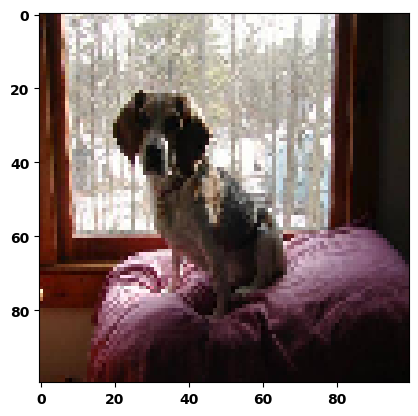

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.98868865]]
Our model says it is a: dog


In [254]:
from tensorflow.keras.preprocessing import image
import random
#here when we give the address of the folder which contains photos of cats and dogs which are picked randomly by the "Random function" .
test_folder_path = 'Give your folder location of test data set'
test_image_files = os.listdir(test_folder_path)
test_image_files = [file for file in test_image_files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
random_image_file = random.choice(test_image_files)

random_image_path = os.path.join(test_folder_path, random_image_file)


img = image.load_img(random_image_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
plt.imshow(img)
plt.show()
img_array = img_array.reshape((1, img_width, img_height, 3))
img_array = img_array / 255.0

# Make predictions
pred = model.predict(img_array)
print(pred)
pred_class = "dog" if pred > 0.5 else "cat"
print("Our model says it is a:", pred_class)
